neural_network

# ARIMA

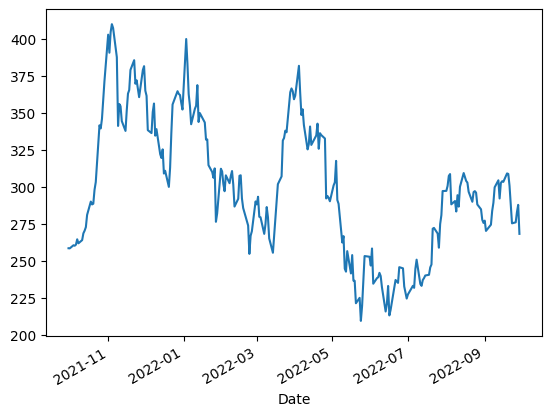

In [53]:
from pandas import read_csv
from datetime import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
import numpy as np

# Suppress all warnings
import warnings
warnings.filterwarnings('ignore')

def parser(x):
	return datetime.strptime(x,'%Y-%m-%d')
 
series = read_csv('data/stock_yfinance_data_tsla.csv', header=0, parse_dates=[0], index_col=0)
series = series["Close"]
series.plot()
pyplot.show()

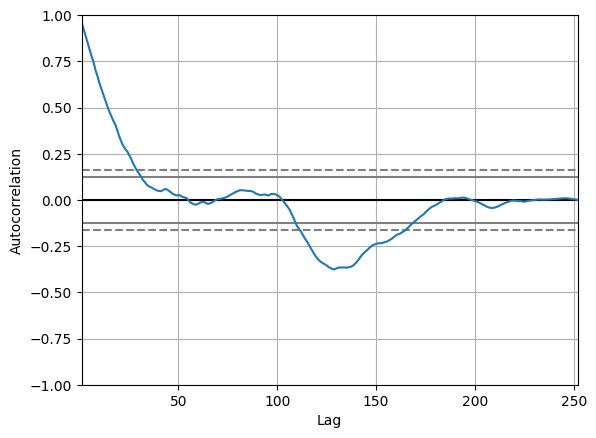

In [54]:
autocorrelation_plot(series)
pyplot.show()

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  252
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -986.629
Date:                Sat, 09 Nov 2024   AIC                           1985.259
Time:                        19:35:40   BIC                           2006.412
Sample:                             0   HQIC                          1993.771
                                - 252                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0189      0.073     -0.260      0.795      -0.161       0.123
ar.L2          0.0037      0.059      0.063      0.949      -0.112       0.119
ar.L3         -0.0277      0.080     -0.347      0.7

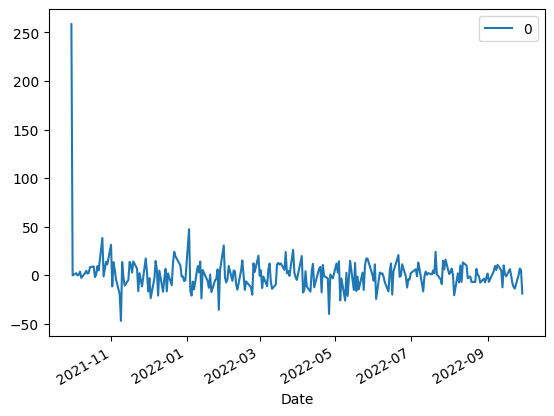

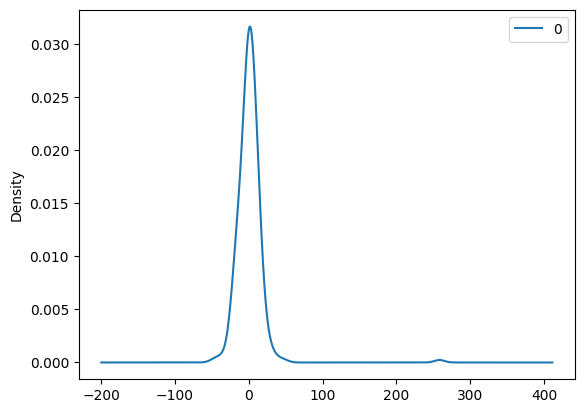

                0
count  252.000000
mean     1.064161
std     20.421631
min    -46.962810
25%     -6.788812
50%      0.796174
75%      6.653102
max    258.493347


In [55]:

# fit an ARIMA model and plot residual errors
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot

# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

predicted=235.910004, expected=253.210007
predicted=253.210007, expected=252.753326
predicted=252.753326, expected=246.789993
predicted=246.789993, expected=258.333344
predicted=258.333344, expected=234.516663
predicted=234.516663, expected=238.279999
predicted=238.279999, expected=238.886673
predicted=238.886673, expected=241.866669
predicted=241.866669, expected=239.706665
predicted=239.706665, expected=232.229996
predicted=232.229996, expected=215.736664
predicted=215.736664, expected=220.889999
predicted=220.889999, expected=233.000000
predicted=233.000000, expected=213.100006
predicted=213.100006, expected=216.759995
predicted=216.759995, expected=237.036667
predicted=237.036667, expected=236.086670
predicted=236.086670, expected=235.070007
predicted=235.070007, expected=245.706665
predicted=245.706665, expected=244.919998
predicted=244.919998, expected=232.663330
predicted=232.663330, expected=228.490005
predicted=228.490005, expected=224.473328
predicted=224.473328, expected=227

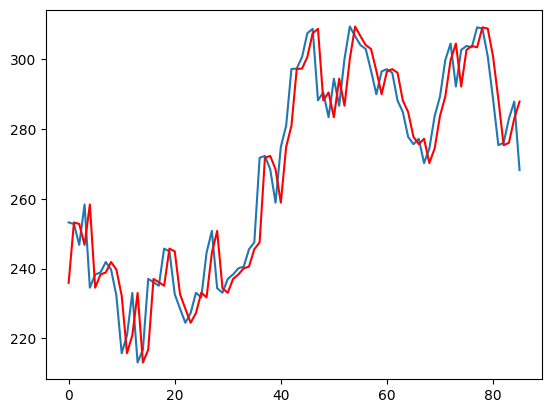

In [56]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(0,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

Average Mean Squared Error (MSE): 98.46675083469125


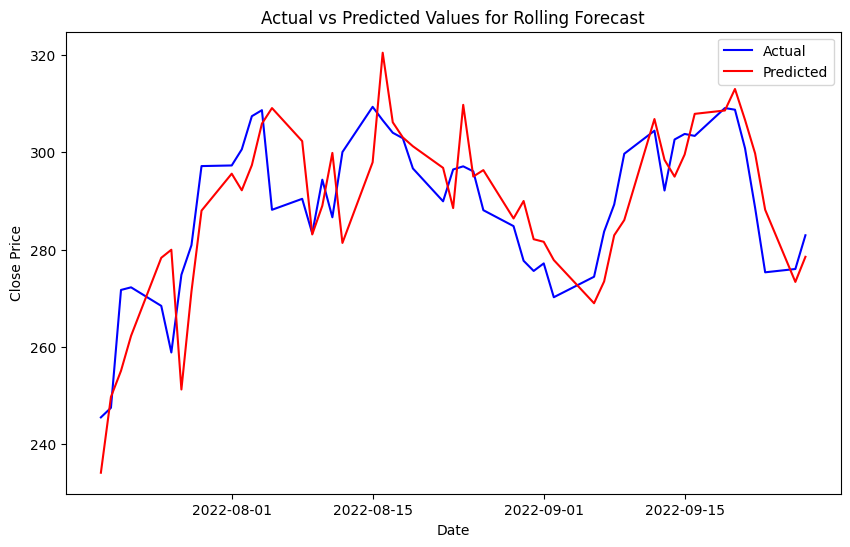

In [57]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assume df is your DataFrame with multiple columns for different time series
df = pd.read_csv("data/stock_yfinance_data_tsla.csv", parse_dates=['Date'], index_col='Date')

# Define the dependent and exogenous variables
y = df[['Close']]  # Dependent variable
exog = df[['Volume', 'Open']]  # Exogenous variables

# Define training and testing periods (e.g., split dataset into train and test)
train_size = 200
train_y = y[:train_size]
test_y = y[train_size:]
train_exog = exog[:train_size]
test_exog = exog[train_size:]

# Rolling forecast
predicted_values = []  # To store predicted values
mse_values = []  # To store MSE values
test_indices = []  # To store the test indices for plotting

for i in range(50):
    # Train on the data up to the current point
    train_y = y[:train_size + i]
    train_exog = exog[:train_size + i]
    test_y_current = y[train_size + i: train_size + i + 1]  # Single actual value for current step
    test_exog_current = exog[train_size + i: train_size + i + 1]  # Corresponding exog variable

    # Fit the SARIMAX model
    model = SARIMAX(train_y, exog=train_exog, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    result = model.fit()

    # Forecast the next step
    forecast = result.get_forecast(steps=1, exog=test_exog_current)
    forecast_value = forecast.predicted_mean.iloc[0]

    # Store the forecasted value and the corresponding index
    predicted_values.append(forecast_value)
    test_indices.append(test_y_current.index[0])

    # Calculate MSE for the current step (since it's a rolling forecast)
    mse = mean_squared_error(test_y_current, [forecast_value])
    mse_values.append(mse)

# Average MSE across all forecast steps
avg_mse = np.mean(mse_values)
print(f'Average Mean Squared Error (MSE): {avg_mse}')

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(test_indices, test_y[:50], label='Actual', color='blue')  # Actual values
plt.plot(test_indices, predicted_values, label='Predicted', color='red')  # Predicted values
plt.title('Actual vs Predicted Values for Rolling Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


# LSTM

In [58]:
data = pd.read_csv('data/stock_yfinance_data_tsla.csv', header=0, index_col=0, parse_dates=True)
data = data[['Open', 'High', 'Low', 'Close']]

In [59]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns=data.columns)

In [60]:
# Function to create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        # Extract sequence of length `seq_length`
        X_sequence = data.iloc[i:i+seq_length].values  # Convert to numpy array
        X.append(X_sequence)
        
        # Target is the 'Close' price after the sequence
        y.append(data.iloc[i + seq_length]['Close'])
    return np.array(X), np.array(y)

In [61]:
# Hyperparameters
seq_length = 60  # The number of time steps (days) to look back
X, y = create_sequences(scaled_data, seq_length)

# Reshape X for LSTM (samples, time steps, features)
# X is already in the correct shape as a 3D array of (samples, time steps, features)
# It doesn't need further reshaping, as `create_sequences` already returns this format

# Split into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Checking the shapes
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(153, 60, 4) (39, 60, 4) (153,) (39,)


In [62]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50))
model.add(Dense(1))

In [63]:
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Train on 153 samples, validate on 39 samples
Epoch 1/20
153/153 [==============================] - 1s 8ms/sample - loss: 0.1522 - val_loss: 0.0081
Epoch 2/20
153/153 [==============================] - 0s 1ms/sample - loss: 0.0346 - val_loss: 0.0166
Epoch 3/20
153/153 [==============================] - 0s 1ms/sample - loss: 0.0244 - val_loss: 0.0046
Epoch 4/20
153/153 [==============================] - 0s 1ms/sample - loss: 0.0206 - val_loss: 0.0076
Epoch 5/20
153/153 [==============================] - 0s 1ms/sample - loss: 0.0199 - val_loss: 0.0043
Epoch 6/20
153/153 [==============================] - 0s 1ms/sample - loss: 0.0166 - val_loss: 0.0054
Epoch 7/20
153/153 [==============================] - 0s 1ms/sample - loss: 0.0160 - val_loss: 0.0052
Epoch 8/20
153/153 [==============================] - 0s 1ms/sample - loss: 0.0149 - val_loss: 0.0040
Epoch 9/20
153/153 [==============================] - 0s 1ms/sample - loss: 0.0141 - val_loss: 0.0039
Epoch 10/20
153/153 [================

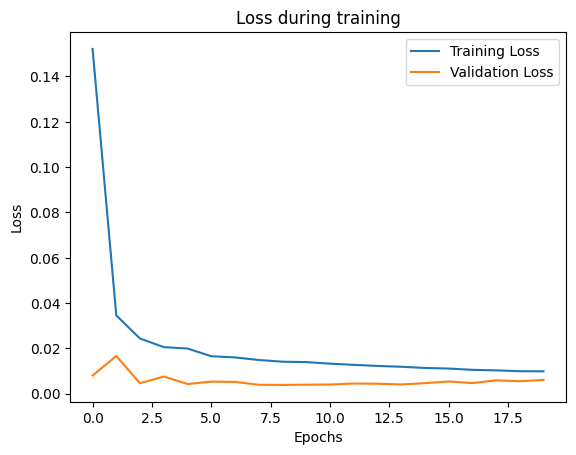

In [64]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss during training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Training MSE: 380.235406803392
Test MSE: 245.6539202976232


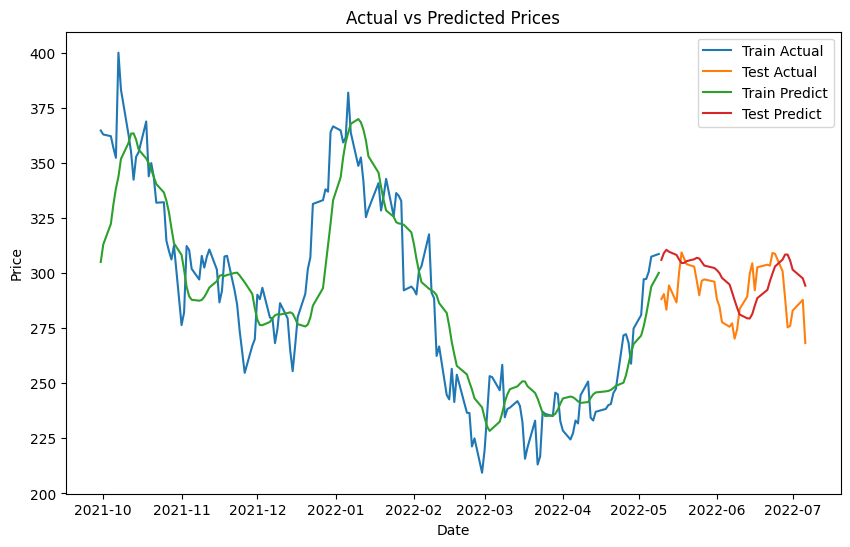

In [65]:
# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Reverse scaling for predictions
train_predict_rescaled = scaler.inverse_transform(np.concatenate((np.zeros((train_predict.shape[0], 3)), train_predict), axis=1))[:, 3]
test_predict_rescaled = scaler.inverse_transform(np.concatenate((np.zeros((test_predict.shape[0], 3)), test_predict), axis=1))[:, 3]

# Reverse scaling for actual values
y_train_actual = scaler.inverse_transform(np.concatenate((np.zeros((y_train.shape[0], 3)), y_train.reshape(-1, 1)), axis=1))[:, 3]
y_test_actual = scaler.inverse_transform(np.concatenate((np.zeros((y_test.shape[0], 3)), y_test.reshape(-1, 1)), axis=1))[:, 3]

# Calculate MSE for training data
train_mse = mean_squared_error(y_train_actual, train_predict_rescaled)

# Calculate MSE for testing data
test_mse = mean_squared_error(y_test_actual, test_predict_rescaled)

# Print MSE
print(f'Training MSE: {train_mse}')
print(f'Test MSE: {test_mse}')

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(data.index[:len(y_train_actual)], y_train_actual, label='Train Actual')
plt.plot(data.index[len(y_train_actual):len(y_train_actual) + len(y_test_actual)], y_test_actual, label='Test Actual')
plt.plot(data.index[:len(train_predict_rescaled)], train_predict_rescaled, label='Train Predict')
plt.plot(data.index[len(train_predict_rescaled):len(train_predict_rescaled) + len(test_predict_rescaled)], test_predict_rescaled, label='Test Predict')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()